<a href="https://colab.research.google.com/github/michelmalki/MichelMalki/blob/main/Inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total Income: 18534
Total Cost: 10800.0
Profit: 7734.0


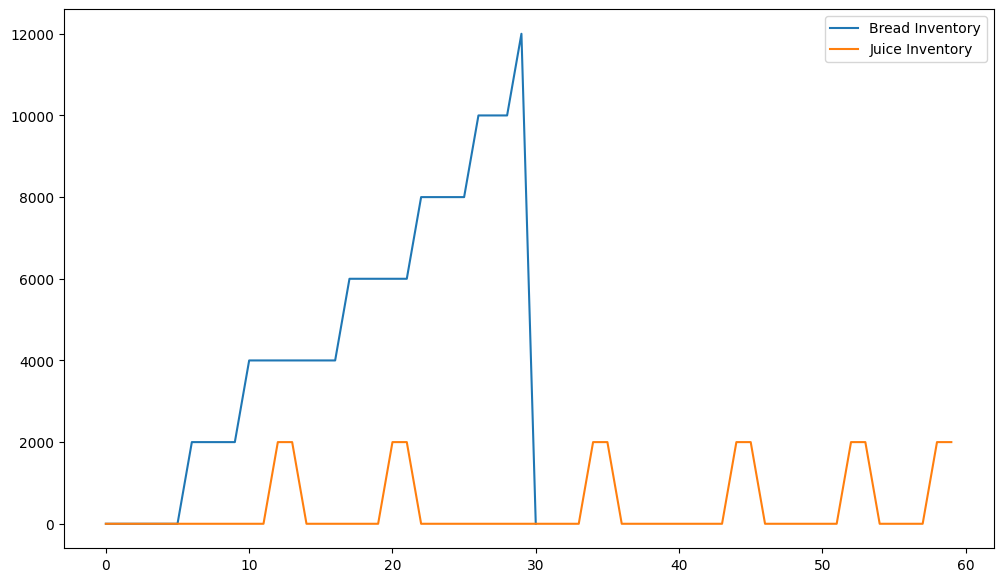

In [159]:
from numpy.random import normal
import matplotlib.pyplot as plt
from random import randint
price_bread = 2
price_juice = 3
# infrastructure
freezerCapacity = 2000
ovenCapacity = 500
# estimated mean and standard deviation
demandMean = 1000
demandSd = 100
leadTimeLow = 2
leadTimeHigh = 8
deliveryCost = 25
unitCost_bread = 0.5
unitCost_juice = 0.4


duration = 30
sales = [ round(d) for d in normal(demandMean, demandSd, duration) ]

reorderPoint_bread = 100
reorderPoint_juice = 150
reorderPoint = 100
cost = 0
income_bread = 0
income_juice = 0

inventory_bread = 0
inventory_juice = 0
inventory = 0
arrival = None
order_bread = None
order_juice = None

inv_bread = []
inv_juice = []
opportunity_bread = []
donated_bread = []

opportunity_juice = []
donated_juice = []

for day in sales:
    inv_bread.append(inventory_bread)
    inv_juice.append(inventory_juice)
    if (inventory_bread < reorderPoint_bread or inventory_juice < reorderPoint_juice)  and arrival is None:
        order_bread = freezerCapacity - inventory
        order_juice = freezerCapacity - inventory
        cost += unitCost_bread * order_bread + unitCost_juice * order_juice
        arrival = randint(leadTimeLow, leadTimeHigh)

    baked_bread = min(inventory, ovenCapacity)
    inventory -= baked_bread
    sold_bread = min(day, baked_bread)
    donated_bread.append(max(baked_bread - sold_bread, 0))
    opportunity_bread.append(max(0, day - baked_bread))
    income_bread += sold_bread * price_bread

    # Juice
    inv_juice.append(inventory_juice)
    # No need to check inventory_juice separately, order when either product is low
    if  (inventory_bread < reorderPoint_bread or inventory_juice < reorderPoint_juice) and arrival is None:
        # Already calculated order for bread, just update the order for juice
        order_juice = min(freezerCapacity - inventory_juice, 100)  # Maximum order for juice

    juice = min(inventory_juice, freezerCapacity)
    inventory_juice -= juice
    sold_juice = min(day, juice)
    donated_juice.append(max(juice - sold_juice, 0))
    opportunity_juice.append(max(0, day - juice))
    income_juice += sold_juice * price_juice

    # Restocking logic
    if arrival is not None:
        arrival -= 1
        if arrival == 0:
            inventory_bread += order_bread
            inventory_juice += order_juice
            assert (inventory_bread <= freezerCapacity) or (inventory_juice <= freezerCapacity)
            arrival = None
            order_bread = None
            order_juice = None



# Calculate total income and profit

unitCost = unitCost_bread + unitCost_juice
total_income = income_bread + income_juice
total_cost = cost
profit = total_income - total_cost
inv_bread.append(inventory)
if inventory < reorderPoint_bread and inventory < reorderPoint_juice and arrival is None: # need more and have not yet ordered
    order = freezerCapacity - inventory
    cost += deliveryCost + unitCost * order
    arrival = randint(leadTimeLow, leadTimeHigh)
baked = min(inventory, ovenCapacity) # either the full oven or whatever is left
inventory -= baked
sold = min(day, baked) # cannot sell more than we baked
donated_bread.append(max(baked - sold, 0)) # track when we baked more than we sold
opportunity_bread.append(max(0, day - baked)) # track when we missed out on some sales
total_income += sold * price_bread
total_income += sold * price_juice
if arrival is not None: # if we are expecting a delivery at the end of the day
    arrival -= 1 # let the days pass
    if arrival == 0: # the arrival is today
      inventory += order # it is here
      assert inventory <= freezerCapacity # make sure we do not violate this
      arrival = None # reset the resupply status
      order = None
total_income - cost
print("Total Income:", total_income)
print("Total Cost:", total_cost)
print("Profit:", profit)
plt.figure(figsize=(12, 7))
plt.plot(inv_bread, label='Bread Inventory')
plt.plot(inv_juice, label='Juice Inventory')
plt.legend()
plt.show()